<a href="https://colab.research.google.com/github/bhavyasri23-dev/Emotion-Detection-of-text-using-LSTM-Internship-Project/blob/main/emotiondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn neattext scikit-learn plotly streamlit

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import seaborn as sns
# Load Text Cleaning Pkgs
import neattext.functions as nfx
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Load Dataset
df = pd.read_csv("/content/tweet_emotions.csv.zip")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


<Axes: xlabel='sentiment', ylabel='count'>

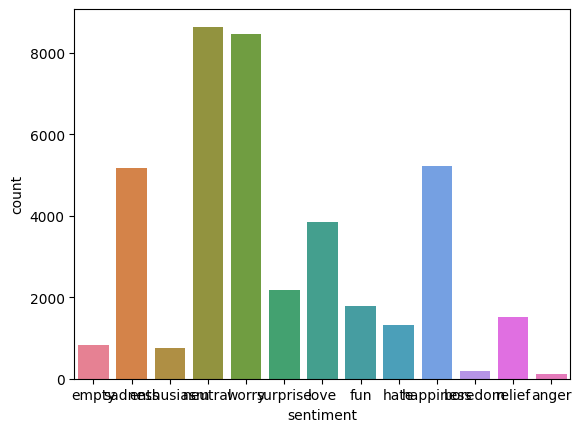

In [ ]:
sns.countplot(x='sentiment',hue='sentiment',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)
# Build Pipeline
from sklearn.pipeline import Pipeline
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(x_test,y_test)

0.33425

In [ ]:
ex1 = "This book was so interesting it made me happy"
pipe_lr.predict([ex1])
pipe_lr.predict_proba([ex1])
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [ ]:
import joblib
pipeline_file = open("/content/emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()


In [ ]:
%%writefile app.py
import streamlit as st
import altair as alt
import plotly.express as px

# EDA Pkgs
import pandas as pd
import numpy as np
from datetime import datetime

# Utils
import joblib

# Load Trained Pipeline
pipe_lr = joblib.load(open("/content/emotion_classifier_pipe_lr_03_june_2021.pkl", "rb"))
# Emoji Mapping
emotions_emoji_dict = {
    "anger": "😠", "disgust": "🤮", "fear": "😨😱", "happy": "🤗", "joy": "😂",
    "neutral": "😐", "sad": "😔", "sadness": "😔", "shame": "😳", "surprise": "😮"
}

# Prediction Functions
def predict_emotions(docx):
    results = pipe_lr.predict([docx])
    return results[0]

def get_prediction_proba(docx):
    results = pipe_lr.predict_proba([docx])
    return results



# Main Application
def main():
    st.title("Emotion Classifier App")
    menu = ["Home", "Monitor", "About"]
    choice = st.sidebar.selectbox("Menu", menu)

    if choice == "Home":
        st.subheader("Emotion Detection from Text")

        with st.form(key='emotion_clf_form'):
            raw_text = st.text_area("Enter text here")
            submit_text = st.form_submit_button(label='Analyze')

        if submit_text:
            col1, col2 = st.columns(2)

            # Prediction
            prediction = predict_emotions(raw_text)
            probability = get_prediction_proba(raw_text)

            with col1:
                st.success("Original Text")
                st.write(raw_text)

                st.success("Prediction")
                emoji_icon = emotions_emoji_dict.get(prediction, "")
                st.write(f"{prediction}: {emoji_icon}")
                st.write(f"Confidence: {np.max(probability):.2f}")

            with col2:
                st.success("Prediction Probabilities")
                proba_df = pd.DataFrame(probability, columns=pipe_lr.classes_)
                proba_df_clean = proba_df.T.reset_index()
                proba_df_clean.columns = ["emotions", "probability"]

                fig = alt.Chart(proba_df_clean).mark_bar().encode(
                    x='emotions',
                    y='probability',
                    color='emotions'
                )
                st.altair_chart(fig, use_container_width=True)

    elif choice == "Monitor":
        st.subheader("Monitor App")
        st.info("Monitoring features are disabled in this version (no tracking utils).")

    else:
        st.subheader("About")
        st.markdown("""
        **Emotion Classifier App** detects emotions from raw text using a machine learning model.
        Built with Streamlit, scikit-learn, and a pre-trained pipeline.
        """)

if __name__ == '__main__':
    main()


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.159.179:8501

